# 降维

1. 加快训练速度
2. 筛选掉一些噪音和不必要的细节 使训练结果更好（通常不会发生）
3. 降维到2-3可以从视觉发现重要信息，例如聚类

维数过高训练模型易过拟合

通过增加训练实例的方法来降低过拟合 你可能需要指数级别的训练实例

## 投影

实际情况：(训练实例并不是在所有维度上均匀分布的)
1. 许多特征是常数
2. 其他特征高度相关

In [34]:
import numpy as np
import matplotlib as mpl

In [2]:
sample_weights = np.ones(100)

In [3]:
sample_weights

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [4]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

使用np.linalg.svd()返回的Vt矩阵是转置版本

In [5]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [6]:
m, n = X.shape

S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)

In [7]:
np.allclose(X_centered,U.dot(S).dot(Vt))

True

In [8]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)
X2D_using_svd = X2D

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

In [11]:
X2D[:5]

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049]])

In [12]:
from sklearn.datasets import make_swiss_roll
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

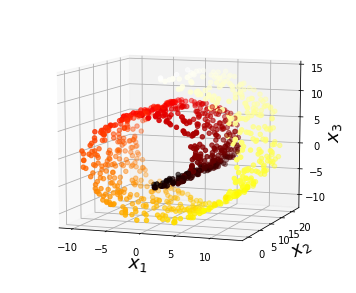

In [13]:
axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

#save_fig("swiss_roll_plot")
plt.show()

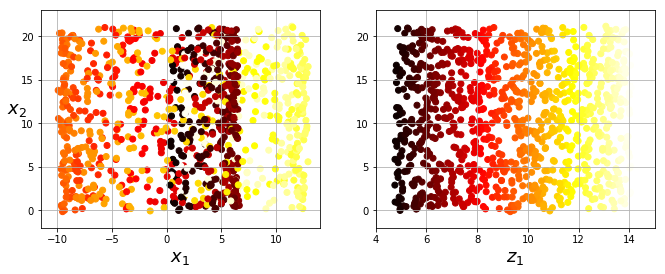

In [14]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis(axes[:4])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot(122)
plt.scatter( t, X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

#save_fig("squished_swiss_roll_plot")
plt.show()

(-12, 15)

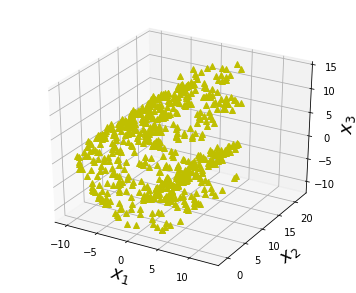

In [15]:
from matplotlib import gridspec

axes = [-11.5, 14, -2, 23, -12, 15]

x2s = np.linspace(axes[2], axes[3], 10)
x3s = np.linspace(axes[4], axes[5], 10)
x2, x3 = np.meshgrid(x2s, x3s)

fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(111, projection='3d')

positive_class = X[:, 0] > 5
X_pos = X[positive_class]
X_neg = X[~positive_class]

ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")

ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

In [16]:
from six.moves import urllib
from scipy.io import loadmat
import os

mnist_path = os.path.join(".", "datasets", "mnist-original.mat")

if os.path.exists(mnist_path)==False:
    # download dataset from github.
    mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat" 
    response = urllib.request.urlopen(mnist_alternative_url)
    with open(mnist_path, "wb") as f:
        content = response.read()
        f.write(content)
else:
    mnist_raw = loadmat(mnist_path)
    mnist = {
        "data": mnist_raw["data"].T,
        "target": mnist_raw["label"][0],
        "COL_NAMES": ["label", "data"],
        "DESCR": "mldata.org dataset: mnist-original",
    }
    print("Done!")

Done!


In [17]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [18]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [20]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [21]:
pca.explained_variance_ratio_

array([9.79085038e-02, 7.14447647e-02, 6.14507328e-02, 5.42183485e-02,
       4.91071200e-02, 4.30708507e-02, 3.27267335e-02, 2.89335784e-02,
       2.76194491e-02, 2.33826899e-02, 2.10436239e-02, 2.03975769e-02,
       1.70721508e-02, 1.69537023e-02, 1.57918508e-02, 1.48734235e-02,
       1.31712211e-02, 1.27779818e-02, 1.18681165e-02, 1.15093354e-02,
       1.06463066e-02, 1.01173602e-02, 9.60168519e-03, 9.11011638e-03,
       8.78738255e-03, 8.35889257e-03, 8.05382077e-03, 7.85296069e-03,
       7.38460537e-03, 6.88145500e-03, 6.56435255e-03, 6.44727312e-03,
       6.00699351e-03, 5.83802398e-03, 5.67574511e-03, 5.42268805e-03,
       5.04010291e-03, 4.84444994e-03, 4.79021418e-03, 4.64612075e-03,
       4.54282479e-03, 4.43236418e-03, 4.17088768e-03, 3.95142029e-03,
       3.81962592e-03, 3.75427884e-03, 3.60751989e-03, 3.49972441e-03,
       3.38615284e-03, 3.20193429e-03, 3.16097432e-03, 3.11042073e-03,
       2.95910465e-03, 2.87179988e-03, 2.81085759e-03, 2.69226182e-03,
      

In [22]:
d

154

In [24]:
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)

In [29]:
np.sum(pca.explained_variance_ratio_)

0.9500779674282471

In [30]:
X_recovered = pca.inverse_transform(X_reduced)

In [31]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Text(0.5,1,'Compressed')

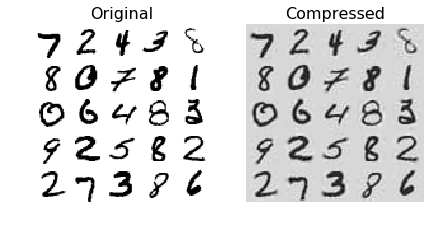

In [35]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)


# 增量 PCA（Incremental PCA）
### 先前 PCA 实现的一个问题是它需要在内存中处理整个训练集以便 SVD 算法运行。幸运的是，我们已经开发了增量 PCA（IPCA）算法：您可以将训练集分批，并一次只对一个批量使用 IPCA 算法。这对大型训练集非常有用，并且可以在线应用 PCA（即在新实例到达时即时运行）。


# 随机 PCA（Randomized PCA）
#### 它的计算复杂度是 O(m × d^2) + O(d^3) ，而不是 O(m × n^2) + O(n^3) ，所以当 d 远小于 n 时，它比之前的算法快得多。

# 核 PCA（Kernel PCA）

### 同样的技巧可以应用于 PCA，从而可以执行复杂的非线性投影来降低维度。这就是所谓的核 PCA（kPCA）。它通常能够很好地保留投影后的簇，有时甚至可以展开分布近似于扭曲流形的数据集。

# LLE
### 局部线性嵌入（Locally Linear Embedding）是另一种非常有效的非线性降维（NLDR）方法。这是一种流形学习技术，不依赖于像以前算法那样的投影。简而言之，LLE 首先测量每个训练实例与其最近邻（c.n.）之间的线性关系，然后寻找能最好地保留这些局部关系的训练集的低维表示（稍后会详细介绍） 。这使得它特别擅长展开扭曲的流形，尤其是在没有太多噪音的情况下。
